# Lab 3: Finding Primitives

## Objective

In this lab, you will implement and visualize three fundamental computer vision primitives:

* Harris Corner Detection – to detect corner points in an image.

* Canny Edge Detection – to detect edges using gradient-based filtering.

* Hough Line Transform – to detect straight lines from an edge map.

These techniques are foundational for many higher-level vision tasks such as object detection, image stitching, and shape analysis.

Some keywords to calrify
- Keypoints
- Features
- Keypoint features
- Interest points
- Correspondences

## 1. Canny Edge Detection

Canny edge detection consists of multiple steps:
1. Noise reduction using Gaussian filter.
2. Gradient calculation in the x and y directions.
3. Non-maximum suppression to thin out edges.
4. Double thresholding and edge tracking by hysteresis.

References:
- https://docs.opencv.org/4.x/da/d22/tutorial_py_canny.html?ref=blog.roboflow.com
- https://en.wikipedia.org/wiki/Canny_edge_detector

### OpenCV Canny Edge Detection
Here, we will use OpenCV's built-in `cv2.Canny()` function for edge detection.

Key Parameters:

* threshold1 → Lower threshold for edge linking.

* threshold2 → Upper threshold for strong edges.

In [16]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img_path = 'assets/3d_drawings.jpg'

img = cv.imread(img_path)

assert img is not None, "file could not be read, check with os.path.exists"


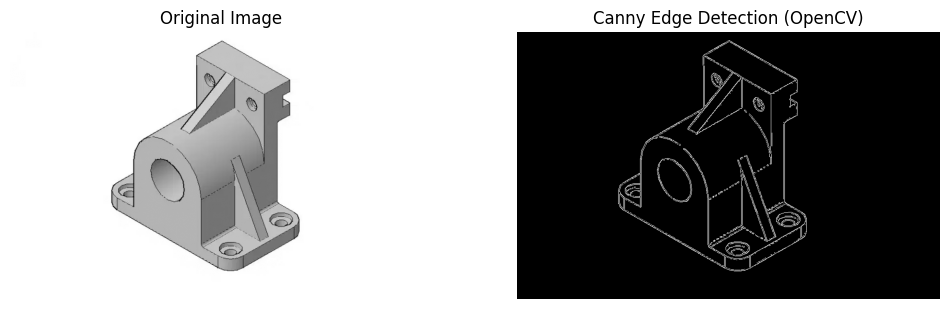

In [17]:
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

#Define
thres1 = 100  # Lower threshold (try values like 50, 100, 150)
thres2 = 200  # Upper threshold (try values like 150, 200, 250)

edges = cv.Canny(img_gray, thres1, thres2, L2gradient= 1) 
# parameters are threshold1 and threshold2, L2gradient determines which function to use for calculating the gradient

# Displaying using matplotlib
plt.figure(figsize=(12, 8))
plt.subplot(1,2,1),plt.imshow(img_gray,'gray')
plt.title('Original Image')
plt.axis("off")
plt.subplot(1,2,2),plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection (OpenCV)')
plt.axis("off")
plt.show()

### Check with different thresholding values!

## 2. Harris Corner Detection

Harris corner detection identifies corners by analyzing the gradients of the image in different directions. It uses the following steps:
1. Compute the image gradients. $$I_x , I_y$$
2. Compute the products of gradients at every pixel. $$Ix^2, Iy^2, and Ix*Iy$$
3. Form the Harris matrix and compute the response at each pixel.
4. Apply thresholding to identify corners.


References:
- https://docs.opencv.org/4.x/dc/d0d/tutorial_py_features_harris.html
- https://en.wikipedia.org/wiki/Harris_corner_detector

In [3]:
# Import libraries

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

### OpenCV Harris Corner Detection
Here, we will use OpenCV's built-in `cv2.cornerHarris()` function to detect corners.


Theory
* Detects corners by measuring changes in intensity in all directions.

* Based on eigenvalues of the gradient covariance matrix.

* A high response means a significant change in intensity in both X and Y directions → corner.

Key Parameters:

* blockSize → Neighborhood size for corner detection.

* ksize → Sobel operator aperture size.

* k → Harris detector free parameter (typically 0.04 - 0.06).

In [ ]:
# Read an image:

import cv2


img_path_local = 'assets/chessboard.jpg'
# Load BGR (OpenCV default)
img_bgr = cv2.imread(img_path_local)

assert img_bgr is not None, "File not found, check the path"
cv2.imshow('BGR Image', img_bgr)
cv2.waitKey(0)
cv2.destroyAllWindows()

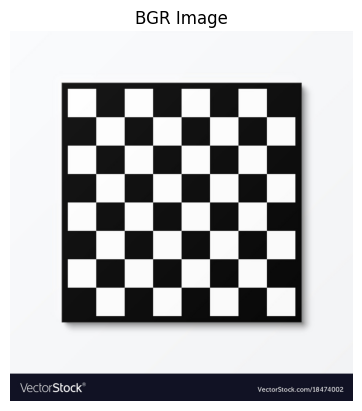

In [1]:
import matplotlib.pyplot as plt
import cv2 as cv

img_path_local = 'assets/chessboard.jpg'
img_bgr = cv.imread(img_path_local)
assert img_bgr is not None, "File not found, check the path"

img_rgb = cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.title('BGR Image')
plt.axis('off')
plt.show()

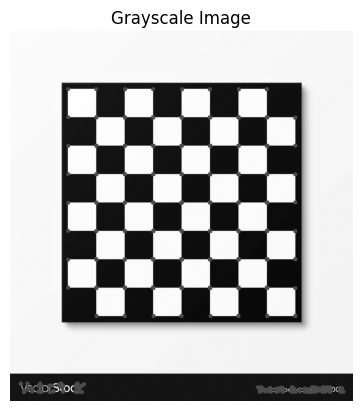

In [14]:
import cv2 as cv
import numpy as np  # Add this import to fix the error

img_gray = cv.cvtColor(img_bgr, cv.COLOR_BGR2GRAY).astype(np.float32)
plt.imshow(img_gray, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()

In [3]:
# Lets calculate the harris response
# Harris Corner Detection
import matplotlib.pyplot as plt

# Use img_gray defined in cell 13
harris_response = cv.cornerHarris(img_gray, blockSize=3, ksize=3, k=0.04)
# blockSize (neighborhood), ksize (Sobel aperture), k (Harris free param)

plt.imshow(harris_response, cmap='gray')
plt.title('Harris Response')
plt.axis('off')

NameError: name 'img_gray' is not defined

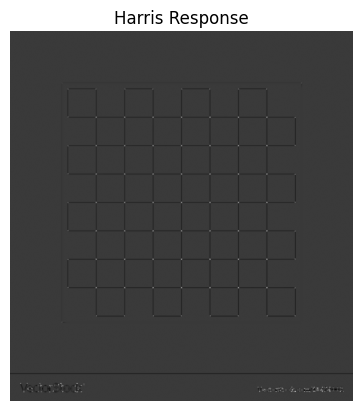

In [4]:
import cv2 as cv
import numpy as np

img_bgr = cv.imread('assets/chessboard.jpg')
img_gray = cv.cvtColor(img_bgr, cv.COLOR_BGR2GRAY).astype(np.float32)

harris_response = cv.cornerHarris(img_gray, blockSize=3, ksize=3, k=0.04)
plt.imshow(harris_response, cmap='gray')
plt.title('Harris Response')
plt.axis('off')
plt.show()

(np.float64(-0.5), np.float64(999.5), np.float64(1079.5), np.float64(-0.5))

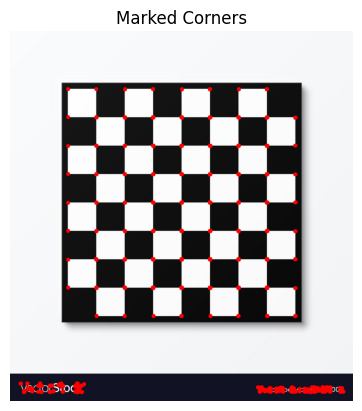

In [10]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# harris_response is the output of the Harris corner detector.

# Lets dilate the response to mark corners
kernel = np.ones((5, 5), np.uint8)  # bigger kernel = bigger dots
harris_response_dilated = cv.dilate(harris_response, kernel)

# Threshold
# Only pixels stronger than this threshold are considered as corners.

th = 0.1 * harris_response_dilated.max()  # adjust if too sparse/dense

# You can adjust 0.1 to get fewer or more corners (higher threshold = fewer corners).

# Copy original image to mark corners
marked_bgr = img_bgr.copy()

# Mark corners as filled circles

# 1. Get coordinates of pixels above the threshold
coords = np.argwhere(harris_response_dilated > th)  # returns (y, x)

# 2. Draw circles at these coordinates
for y, x in coords:
    cv.circle(marked_bgr, (x, y), radius=3, color=(0, 0, 255), thickness=-1)

marked_rgb = cv.cvtColor(marked_bgr, cv.COLOR_BGR2RGB)
plt.imshow(marked_rgb)
plt.title('Marked Corners')
plt.axis('off')


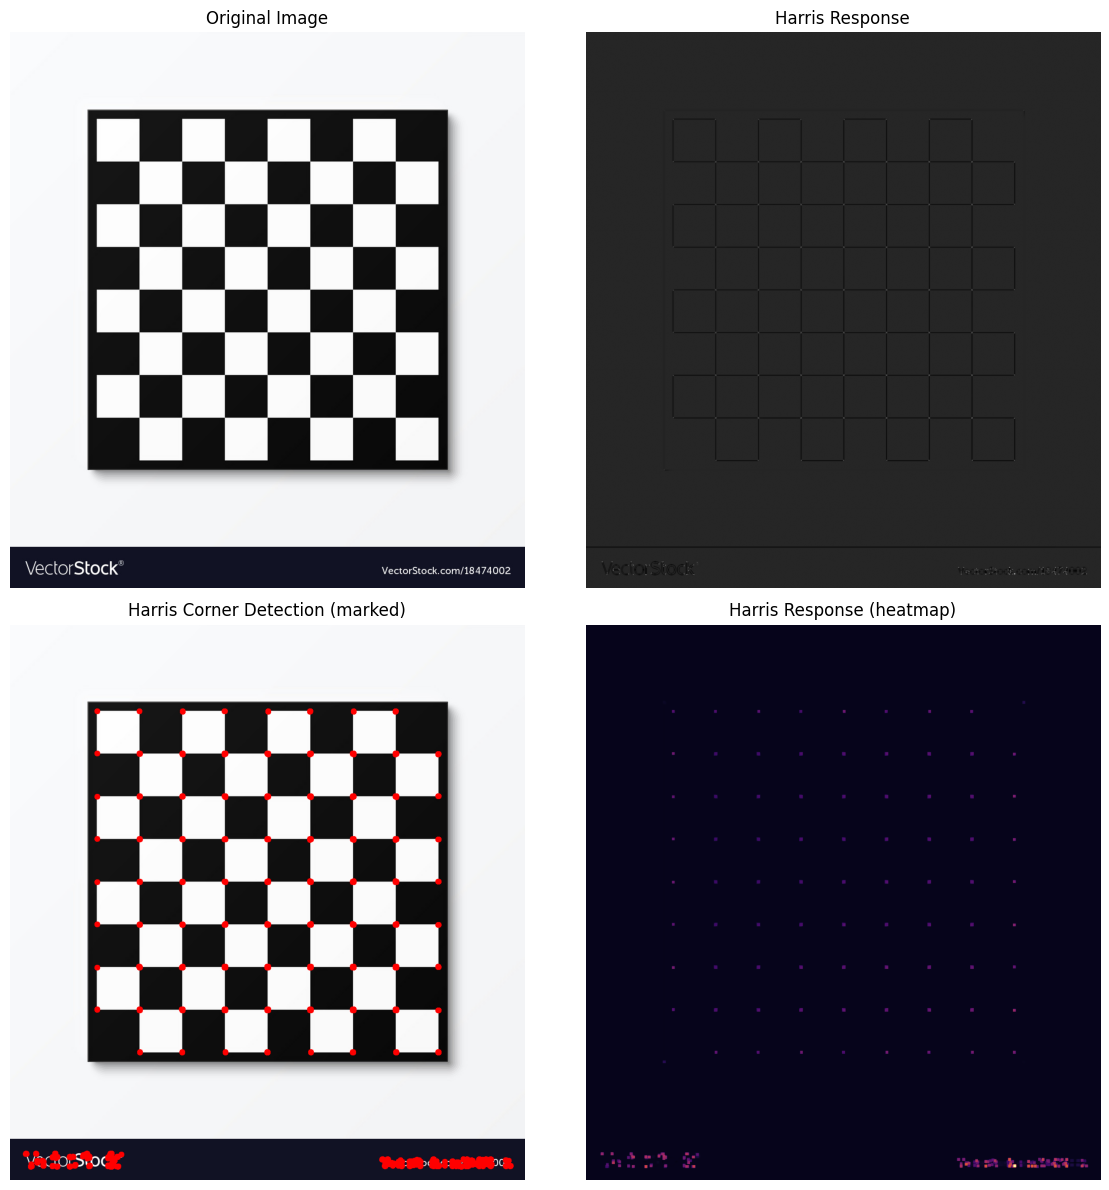

In [6]:
# Lets combine all the steps in a single code block
# OpenCV Implementation

#If you are using the local machine
img_path_local = 'assets/chessboard.jpg'

# Load BGR (OpenCV default)
img_bgr = cv.imread(img_path_local)
assert img_bgr is not None, "file could not be read, check with os.path.exists"

# Keep copies
orig_bgr = img_bgr.copy()
work_gray = cv.cvtColor(img_bgr, cv.COLOR_BGR2GRAY).astype(np.float32)

# Harris Corner Detection
# blockSize=2 (neighborhood), ksize=3 (Sobel aperture), k=0.04 (Harris free param)
harris_response = cv.cornerHarris(work_gray, blockSize=2, ksize=3, k=0.04)

# Dilate to make corner responses more visible
kernel = np.ones((5, 5), np.uint8)  # bigger kernel = bigger dots
harris_dilated = cv.dilate(harris_response, kernel)

# Threshold
th = 0.1 * harris_dilated.max()  # adjust if too sparse/dense

# Mark corners as filled circles
coords = np.argwhere(harris_dilated > th)  # returns (y, x)
for y, x in coords:
    cv.circle(img_bgr, (x, y), radius=3, color=(0, 0, 255), thickness=-1)

# Convert to RGB for Matplotlib display
orig_rgb = cv.cvtColor(orig_bgr, cv.COLOR_BGR2RGB)
marked_rgb = cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB)

# Normalize response just for visualization
resp_norm = cv.normalize(harris_dilated, None, alpha=0, beta=1, norm_type=cv.NORM_MINMAX)

# Why?
# Raw Harris response values are usually large, uneven, and not bounded. Check the next cell for actual values.
# Normalization scales them to a consistent range (0 to 1 here) for better visualization.

# Plot
plt.figure(figsize=(12, 12))

plt.subplot(2, 2, 1)
plt.imshow(orig_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(harris_response, cmap='gray')
plt.title('Harris Response')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(marked_rgb)
plt.title('Harris Corner Detection (marked)')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(resp_norm, cmap='inferno')
plt.title('Harris Response (heatmap)')
plt.axis('off')

plt.tight_layout()
plt.show()

In [7]:
harris_response.max(), harris_response.min()

(np.float32(335000350.0), np.float32(-98629690.0))

In [ ]:
cv.cervel
cv2.magnitude

sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5) 
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)


sobel_combined = cv2.magnitude(sobel_x, sobel_y)


## Harris Response (harris_response)
What it is:

* This is the raw output from OpenCV’s ```cv.cornerHarris()``` function.

* Each pixel stores a corner strength score (a float).

* Higher values mean the pixel is more likely to be a corner.

* Negative or low values mean flat or edge regions.

Purpose:
* This is the actual computed corner measure that you’d threshold to decide whether a pixel is a corner.

Appearance:
* When visualized directly, it often looks noisy and fine-grained, because corners might only light up in a few exact pixels.

## Harris Dilated (harris_dilated)
What it is:

* This is the Harris response after applying a morphological dilation operation.

* Dilation makes the bright (high-response) areas expand in size.

* This does not make the algorithm detect more corners : it only makes existing corner responses more visible.

Purpose:
* Dilation is purely for visualization convenience.

* Without it, corner marks can be so small that they are hard to see in the final image.

* With dilation, those small high-response points become bigger blobs, making them easier to overlay and display.


In [ ]:
## Lets do some recap!

## 3. Hough Line Transform

Theory

* Detects lines by mapping edge points to a parameter space (ρ, θ).

* A line in image space corresponds to a point in Hough space.

* Accumulator space is used to find the most voted lines.

Key Parameters:

* rho → Distance resolution in pixels.

* theta → Angle resolution in radians.

* threshold → Minimum number of votes.

### How it works

**Canny Edge Detection**

* Finds edges in the image (binary edge map).

* The edges act as candidate points for the Hough Transform.

**`cv.HoughLines`**

* Takes each edge point and maps it into ρ–θ parameter space.

* Finds peaks in that space, where multiple points correspond to the same potential line.

**Line Drawing**

* Converts (ρ, θ) back into two points (x1, y1) and (x2, y2) far apart, so the line spans the image.




(750, 1000)


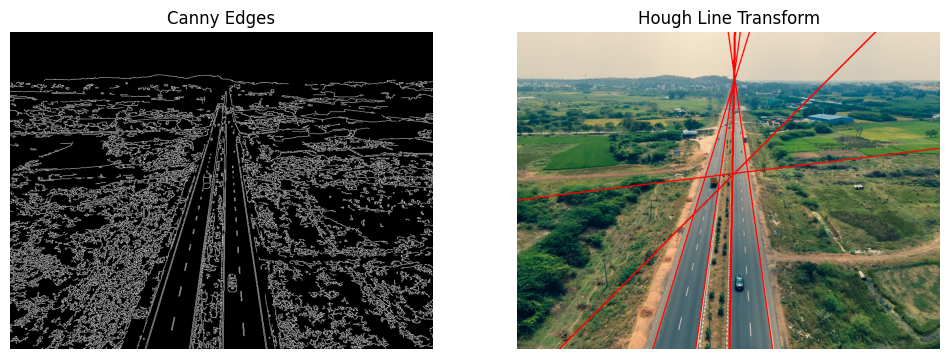

In [5]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img_path = 'assets/road_rural.jpg'

img = cv.imread(img_path)

assert img is not None, "file could not be read, check with os.path.exists"

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

edges = cv.Canny(gray, 90, 250)
print(edges.shape)


# If you want to use automatic thresholding based on median
# v = np.median(gray)
# lower = int(max(0, 0.66*v))
# upper = int(min(255, 1.33*v))
# edges = cv.Canny(gray, lower, upper, apertureSize=3, L2gradient=True)

# Hough Line Transform
lines = cv.HoughLines(edges, 1, np.pi/180, threshold=300)
# lines is a list of [rho, theta] pairs (distance, angle)

# Draw infinite-length lines from Hough output
if lines is not None:
    for rho, theta in lines[:, 0]:

        # Convert polar coords (rho, theta) to Cartesian direction
        a = np.cos(theta)  # x-component of the unit direction vector
        b = np.sin(theta)  # y-component of the unit direction vector

        # (x0, y0) is the point on the line closest to the origin (0,0)
        x0 = a * rho
        y0 = b * rho

        #(s cos theta , s sin theta)= x0 , y0

        # Extend the line far in both directions for drawing:
        # - Multiply perpendicular vector (-b, a) by a large number (1000 px)
        # - Add to and subtract from (x0, y0) to get two far-apart endpoints
        #(a, b) >> perpendicular vector is (-b, a)

        # First endpoint (go in the negative perpendicular direction)
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))

        # Second endpoint (go in the positive perpendicular direction)
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))

        # Draw the line on the image in red (BGR: (0, 0, 255)) with thickness=2
        cv.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)


# Showing results:
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edges')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Hough Line Transform')
plt.axis('off')
plt.show()

#lines.shape #N, 1,2

In [ ]:
edges.shape #6 lines detected #a pixel where identified form point #should be 7 lines but 6 lines one line is in the same location as another line
edges.shape #

(750, 1000)

In [ ]:
edges #a pixel where identified form point

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(750, 1000), dtype=uint8)

In [9]:
edges.min(),edges.max() #

(np.uint8(0), np.uint8(255))

### Hough Circle 

Image taken from: [link](https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.fubiz.net%2F2014%2F12%2F01%2Fcircular-installations-in-nature%2Fcircular-installations-in-nature-4%2F&psig=AOvVaw1spe2pGe5UpjjlS1_xt7jM&ust=1757212963270000&source=images&cd=vfe&opi=89978449&ved=0CBUQjRxqFwoTCIj20cqOw48DFQAAAAAdAAAAABAY)

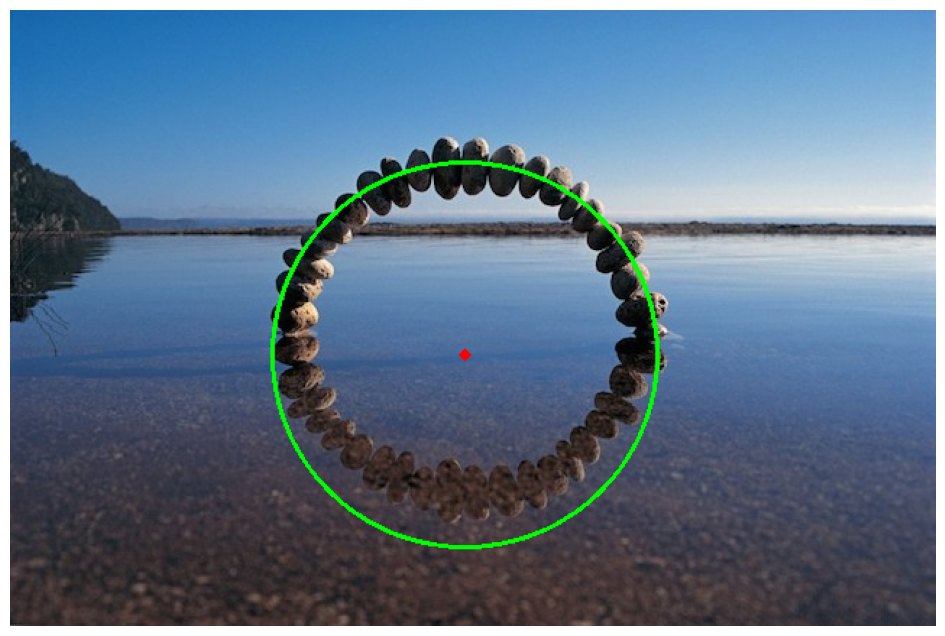

In [11]:
img_path = 'assets/circle_1.jpg'

img = cv.imread(img_path)

assert img is not None, "file could not be read, check with os.path.exists"

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

circles = cv.HoughCircles(gray,cv.HOUGH_GRADIENT,1,500,
                            param1=50,param2=30,minRadius=0,maxRadius=0)
# param1 = higher threshold for Canny edge detector (lower is half of this)
# param2 = accumulator threshold for circle centers (lower = more false circles)

# Draw detected circles
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        # Draw the outer circle green circle
        cv.circle(img, (i[0], i[1]), i[2], (0, 255, 0), 2)
        # Draw the center of the circle red circle
        cv.circle(img, (i[0], i[1]), 2, (0, 0, 255), 3)

# Showing results:
plt.figure(figsize=(12, 8))
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [12]:
circles.shape

(1, 1, 3)

In [ ]:
import os
os.path.exists(img_path)

True